In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

clientes = pd.read_csv('clientes.csv')

pagadores = clientes[clientes["cumplio"] == 1]
deudores = clientes[clientes["cumplio"] == 0]

pagadores, deudores


(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

# Gráfica: Pagadores vs Deudores

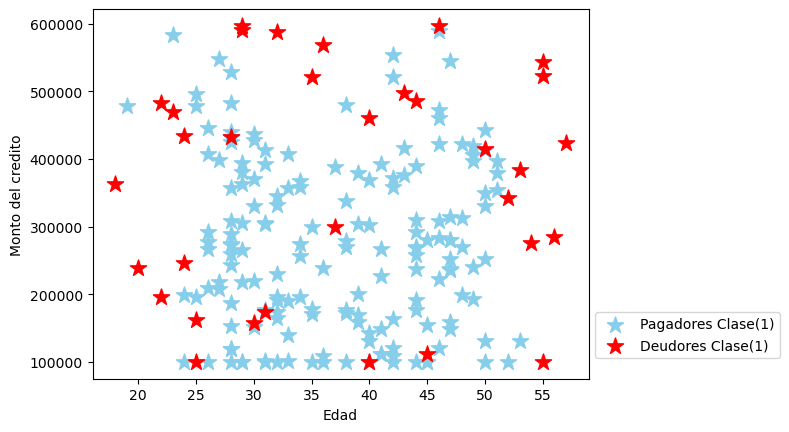

In [11]:
plt.scatter(pagadores["edad"], pagadores["credito"], marker="*", s=150, color="skyblue", label="Pagadores Clase(1)")
plt.scatter(deudores["edad"], deudores["credito"], marker="*",
            s=150, color="red", label="Deudores Clase(1)")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

# Escalar los datos

In [12]:
datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]
#
escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(datos)
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

# Creación del modelo KNN
## Valor de K, con distancia mínima sería de k=1

In [13]:
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

# Pruebas

/home/aragorn/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase: [[0.66666667 0.33333333]]


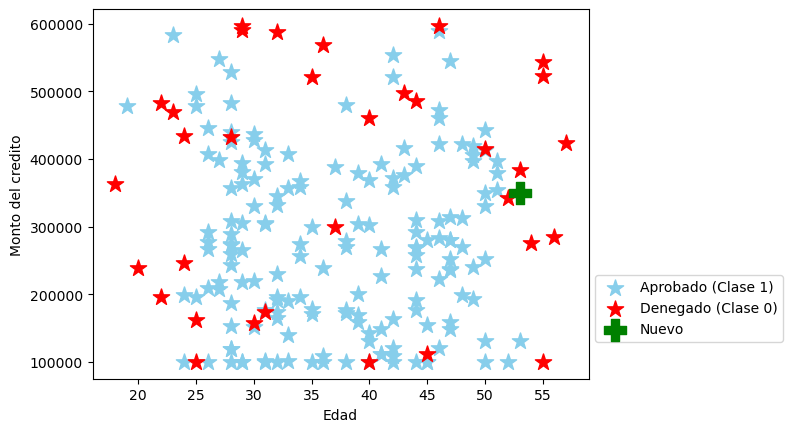

In [19]:
#Datos del nuevo cliente
edad = 53
monto = 350000

# Escalar los datos
solicitante = escalador.transform([[edad, monto]])

# Cálculo de clase y probabilidades
print(f"Clase: {clasificador.predict(solicitante)}")
print(f"Probabilidades por clase: {clasificador.predict_proba(solicitante)}")

# De manera gráfica
plt.scatter(pagadores["edad"], pagadores["credito"], marker="*", s=150, color="skyblue", label="Aprobado (Clase 1)")
plt.scatter(deudores["edad"], deudores["credito"], marker="*", s=150, color="red", label="Denegado (Clase 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Nuevo")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()
